#### import the things

In [1]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

idx = pd.IndexSlice



In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline, Pipeline

In [2]:
# import re
# from collections import Counter
# from textblob import TextBlob as tb

# import pattern.en as ptrn
# import pattern

# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from rake_nltk import Rake
# from nltk.stem import WordNetLemmatizer

# import string
# custom_stopwords = ['amp']
# punc = string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data_fol = r"..\data_files"

df = pd.read_pickle(os.path.join(data_fol, "dataset_text_only.pkl"))

In [6]:
df.head()

,tid,text,clean,hashtags,hashtags_count,mentions,clean_no_@#
0,1333476068192366593,"Teen pregnancy is high, HIV infection rate is ...","[teen, pregnancy, high, hiv, infection, rate, ...",[],0,[],teen pregnancy high hiv infection rate growing...
1,1364161232270487553,Even though it was a charity. Stevens thought...,"[even, though, charity, stevens, thought, spea...","[hiv, haemophilia]",2,[bloodinquiry],even though charity stevens thought speaking d...
2,1364161201291153414,SCORA\nStanding Committee on Sexual &amp; Repr...,"[scora, standing, committee, sexual, reproduct...",[],0,[],scora standing committee sexual reproductive h...
3,1364161184505737217,"many females are HIV+, we wish you well, bless...","[many, female, hiv, wish, well, blessing, cant...",[],0,[],many female hiv wish well blessing cant heal t...
4,1363439109948149760,@TheRustler83 Yep. Imagine if the government w...,"[therustler83, yep, imagine, government, deman...",[],0,[therustler83],yep imagine government demanding hiv test week...


#### try a few different transformations

Pipeline of countvectorizing and tfdif

In [37]:
pipeline = Pipeline(steps=[
                        ('countvect', CountVectorizer(min_df=.005)),
                        ('tfdif', TfidfTransformer())
                            ])

In [38]:
p_xform = pipeline.fit_transform(df['clean_no_@#'])

In [39]:
pd.DataFrame(p_xform.toarray(), columns=pipeline['countvect'].get_feature_names())

,10,12,1980s,20,2020,2021,30,40,80,90,...,worked,working,world,would,wrong,year,yes,yet,young,youre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.150182,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
18257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
18258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
18259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.34572,0.0,0.0,0.0,0.0,0.0,0.0


Just tfidf with a feature limit

In [44]:
tf = TfidfVectorizer(stop_words='english', max_features=180,)
tf_xform = tf.fit_transform(df['clean_no_@#'])
tf_df = pd.DataFrame(tf_xform.toarray(), columns=tf.get_feature_names())
tf_df.head()

,2021,80,access,africa,ago,aid,awareness,better,black,blood,...,want,way,week,woman,work,world,year,yes,young,youre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
tf_df.sum().sort_values(ascending=False)

hiv        2853.303527
people      804.401888
hivaids     657.719958
like        491.379114
aid         477.967689
              ...     
impact       88.114741
victim       82.255977
stis         81.851746
kit          79.904011
seen         78.965078
Length: 180, dtype: float64

tfidf with 2-grams

In [50]:
tf = TfidfVectorizer(stop_words='english', max_features=180, ngram_range=(2,2))
tf_xform = tf.fit_transform(df['clean_no_@#'])
tf_2gram_df = pd.DataFrame(tf_xform.toarray(), columns=tf.get_feature_names())
tf_2gram_df.head()

,260 rape,30 year,40 year,accountability justice,acquire disease,affected hiv,aid crisis,aid hiv,antiretroviral therapy,awareness day,...,virus hiv,wife husbandsall,woman girl,woman hiv,woman living,work hiv,world test,year ago,year old,young people
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
tf_2gram_df.sum().sort_values(ascending=False)

hiv positive              376.400623
living hiv                370.599440
hiv aid                   360.054106
people living             333.734663
hiv test                  254.107145
                             ...    
nevada government          14.326177
accountability justice     14.253097
intentionally refusing     13.991585
domestic terrorist         13.421788
day national               12.536681
Length: 180, dtype: float64

tfidf with 2 and 3 grams

In [52]:
tf = TfidfVectorizer(stop_words='english', max_features=180, ngram_range=(2,3))
tf_xform = tf.fit_transform(df['clean_no_@#'])
tf_23gram_df = pd.DataFrame(tf_xform.toarray(), columns=tf.get_feature_names())
tf_23gram_df.head()

,260 rape,260 rape victim,30 year,40 year,accountability justice,acquire disease,acquire disease hiv,aid hiv,awareness day,billion peoplego,...,wife husbandsall usb,woman girl,woman girl hivaids,woman hiv,woman living,work hiv,world test,world test hiv,year ago,young people
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
tf_23gram_df.sum().sort_values(ascending=False)

hiv positive                397.275309
hiv aid                     366.780391
living hiv                  346.088642
people living               311.357765
hiv test                    255.418879
                               ...    
hiv hepatitis stis           14.620417
stis violation               14.043125
stis violation taken         14.043125
hepatitis stis violation     14.043125
accountability justice       12.884965
Length: 180, dtype: float64

## only old stuff below this. stop here. 

In [41]:
import gensim

In [45]:
from gensim.summarization import keywords, summarize

In [ ]:
# from rake_nltk import Rake

In [15]:
r = Rake()
r.extract_keywords_from_text(tweet)
r.get_ranked_phrases()

['present highly skewed rw views',
 'thay also advocate creationism',
 'abortion causes breast cancer',
 'oppose gun control',
 'highly partial',
 'little google',
 'con fruit',
 'cause aids',
 'ultra',
 'thehouseh',
 'still',
 'robinmonotti',
 'review',
 'nktcyork',
 'misleading',
 'loops',
 'juliahb1',
 'inspdet',
 'hiv',
 'amp',
 'aaps',
 '101cognitive']

#### parts of speech

In [33]:
nltk.pos_tag(t_lems)

[('still', 'RB'),
 ('little', 'JJ'),
 ('google', 'JJ'),
 ('aaps', 'NNS'),
 ('ultra-con', 'JJ'),
 ('fruit-loops', 'JJ'),
 ('present', 'JJ'),
 ('highly', 'RB'),
 ('skewed', 'JJ'),
 ('rw', 'NN'),
 ('view', 'NN'),
 ("'review", 'POS'),
 ('highly', 'RB'),
 ('partial', 'JJ'),
 ('misleading', 'NN'),
 ('thay', 'NN'),
 ('also', 'RB'),
 ('advocate', 'JJ'),
 ('creationism', 'NN'),
 ('hiv', 'VBP'),
 ("n't", 'RB'),
 ('cause', 'VB'),
 ('aid', 'JJ'),
 ('abortion', 'NN'),
 ('cause', 'NN'),
 ('breast', 'NN'),
 ('cancer', 'NN'),
 ('oppose', 'VBP'),
 ('gun', 'NNS'),
 ('control', 'NN')]

In [34]:
ptrn.tag(' '.join(t_lems))

[('still', 'RB'),
 ('little', 'JJ'),
 ('google', 'NNP-ORG'),
 ('aaps', 'RB'),
 ('ultra-con', 'VB'),
 ('fruit-loops', 'NNS'),
 ('present', 'VBP'),
 ('highly', 'RB'),
 ('skewed', 'VBN'),
 ('rw', 'JJ'),
 ('view', 'NN'),
 ("'", "''"),
 ('review', 'NN'),
 ('highly', 'RB'),
 ('partial', 'JJ'),
 ('misleading', 'NN'),
 ('thay', 'NN'),
 ('also', 'RB'),
 ('advocate', 'VBP'),
 ('creationism', 'NN'),
 ('hiv', 'NNP'),
 ("n't", 'RB'),
 ('cause', 'VB'),
 ('aid', 'NN'),
 ('abortion', 'NN'),
 ('cause', 'NN'),
 ('breast', 'NN'),
 ('cancer', 'NN'),
 ('oppose', 'WP$'),
 ('gun', 'NN'),
 ('control', 'NN')]

In [35]:
tb(' '.join(t_lems)).tags

[('still', 'RB'),
 ('little', 'JJ'),
 ('google', 'JJ'),
 ('aaps', 'NNS'),
 ('ultra-con', 'JJ'),
 ('fruit-loops', 'JJ'),
 ('present', 'JJ'),
 ('highly', 'RB'),
 ('skewed', 'JJ'),
 ('rw', 'NN'),
 ('view', 'NN'),
 ("'review", 'POS'),
 ('highly', 'RB'),
 ('partial', 'JJ'),
 ('misleading', 'NN'),
 ('thay', 'NN'),
 ('also', 'RB'),
 ('advocate', 'JJ'),
 ('creationism', 'NN'),
 ('hiv', 'VBP'),
 ("n't", 'RB'),
 ('cause', 'VB'),
 ('aid', 'JJ'),
 ('abortion', 'NN'),
 ('cause', 'NN'),
 ('breast', 'NN'),
 ('cancer', 'NN'),
 ('oppose', 'VBP'),
 ('gun', 'NNS'),
 ('control', 'NN')]

#### Sentiment

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [37]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\smana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
tb(tweet).sentiment

Sentiment(polarity=-0.038125, subjectivity=0.335)

In [39]:
ptrn.sentiment(tweet)

(-0.038125, 0.335)

In [40]:
SentimentIntensityAnalyzer().polarity_scores(tweet)

{'neg': 0.177, 'neu': 0.793, 'pos': 0.03, 'compound': -0.8539}

In [41]:
sia = SentimentIntensityAnalyzer()
senti = sia.polarity_scores(tweet)

In [42]:
senti

{'neg': 0.177, 'neu': 0.793, 'pos': 0.03, 'compound': -0.8539}

In [43]:
senti['compound']

-0.8539

In [44]:
sendict = {}
for l in range(len(tdf)):
    temp = {}
    tweet = tdf.iloc[l].values[0]
    
    pattern_vals = ptrn.sentiment(tweet)
    textblob_vals = tb(tweet).sentiment
    nltk_vals = SentimentIntensityAnalyzer().polarity_scores(tweet)
    
    ind = tdf.index[l]
    temp['pattern_polarity'] = pattern_vals[0]
    temp['pattern_subjectivity'] = pattern_vals[1]
    temp['textblob_polarity'] = textblob_vals[0]
    temp['textblob_subjectivity'] = textblob_vals[1]
    temp['nltk_polarity'] = nltk_vals['compound']
    sendict[ind] = temp

In [45]:
sentiment_df = pd.DataFrame(sendict).T

In [46]:
sentiment_df.head()

,pattern_polarity,pattern_subjectivity,textblob_polarity,textblob_subjectivity,nltk_polarity
1333476068192366593,0.08,0.270000,0.08,0.270000,0.1779
1364161232270487553,0.00,0.000000,0.00,0.000000,-0.0772
1364161201291153414,0.25,0.416667,0.25,0.416667,0.4215
1364161184505737217,0.17,0.413333,0.17,0.413333,0.9169
1363439109948149760,0.16,0.540000,0.16,0.540000,0.0772


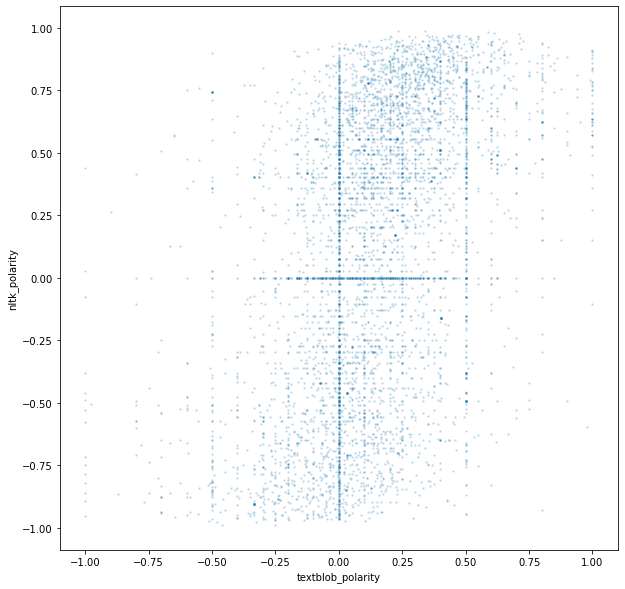

In [197]:
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(data=sentiment_df, x='textblob_polarity', y='nltk_polarity',
               alpha=.3, s=5)
plt.show()

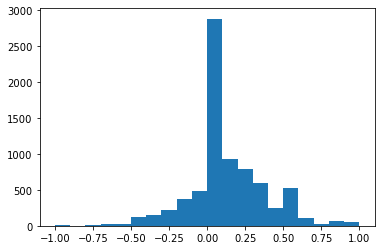

In [199]:
plt.hist(sentiment_df['textblob_polarity'], bins=20)

plt.show()

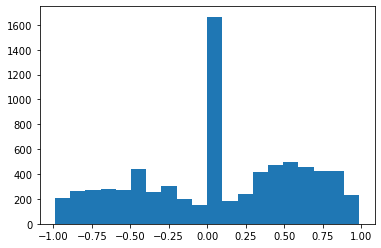

In [200]:
plt.hist(sentiment_df['nltk_polarity'], bins=20)

plt.show()

those distributions are very different...

#### below here is old code I don't want to get rid of just yet

In [12]:
poss = []
for l in range(100):
    t_doc, t_clean, hashtags, mentions = preprocess_tweets(tdf.iloc[l].values[0])
    
    for w in t_doc:
        poss.append(w.pos_)

In [15]:
breakdown_dict = {}
for l in range(len(tdf)):
    temp_dict = {}
    t_doc, t_clean, hashtags, mentions = preprocess_tweets(tdf.iloc[l].values[0])
    poss = []
    for w in t_doc:
        poss.append(w.pos_)
        
    temp_dict['hashtags'] = hashtags
    temp_dict['mentions'] = mentions
    temp_dict['pos_count'] = dict(Counter(poss))
    temp_dict['lemmas'] = t_clean
    ind = tdf.index[l]
    breakdown_dict[ind] = temp_dict

In [16]:
breakdown_dict[1333476068192366593]

{'hashtags': [],
 'mentions': [],
 'pos_count': {'NOUN': 7,
  'AUX': 3,
  'VERB': 3,
  'ADV': 1,
  'ADP': 2,
  'CCONJ': 1,
  'PRON': 1},
 'lemmas': ['teen',
  'pregnancy',
  'hiv',
  'infection',
  'rate',
  'grow',
  'fast',
  'teen',
  'experiment',
  'need',
  'srh']}

In [17]:
pd.DataFrame(breakdown_dict).T

,hashtags,mentions,pos_count,lemmas
1333476068192366593,[],[],"{'NOUN': 7, 'AUX': 3, 'VERB': 3, 'ADV': 1, 'AD...","[teen, pregnancy, hiv, infection, rate, grow, ..."
1364161232270487553,"[hiv, haemophilia]",[bloodinquiry],"{'ADV': 2, 'SCONJ': 3, 'PRON': 1, 'VERB': 5, '...","[stevens, think, speak, dhss, suffer]"
1364161201291153414,[],[],"{'NOUN': 4, 'ADP': 1, 'ADJ': 3, 'CCONJ': 1, 'V...","[committee, sexual, reproductive, health, righ..."
1364161184505737217,[],[],"{'ADJ': 4, 'NOUN': 6, 'AUX': 1, 'PRON': 4, 'VE...","[female, wish, heal, provide, relief, specialt..."
1363439109948149760,[],[therustler83],"{'VERB': 2, 'SCONJ': 1, 'DET': 2, 'NOUN': 3, '...","[imagine, government, demand, hiv, test, weekl..."
...,...,...,...,...
1363947236128866322,[],[],"{'ADJ': 2, 'NOUN': 6, 'VERB': 4, 'PRON': 1, 'P...","[ebony, darkness, dementia, raven, way, fake, ..."
1363947304705753090,[],[samirasawlani],"{'PRON': 1, 'VERB': 2, 'ADJ': 4, 'ADP': 6, 'NO...","[covid, china, major, killer, young, populatio..."
1363947807921561600,[],[],"{'ADV': 1, 'AUX': 1, 'NOUN': 1}",[case]
1363949275005263879,"[boomhealth, bronx, covidvaccine]",[],"{'NOUN': 5, 'VERB': 8, 'ADP': 4, 'AUX': 2, 'AD...","[nyer, live, hiv, eligible, receive, covid, va..."


In [18]:
pos_dict = {key:breakdown_dict[key]['pos_count'] for key in breakdown_dict.keys()}

In [19]:
pos_df = pd.DataFrame(pos_dict).T
pos_df.fillna(0, inplace=True)
pos_df = pos_df.astype(int)

In [20]:
pos_df.head()

,NOUN,AUX,VERB,ADV,ADP,CCONJ,PRON,SCONJ,DET,PROPN,PART,ADJ,NUM,INTJ,X,PUNCT,SYM
1333476068192366593,7,3,3,1,2,1,1,0,0,0,0,0,0,0,0,0,0
1364161232270487553,0,0,5,2,1,0,1,3,3,1,1,0,0,0,0,0,0
1364161201291153414,4,0,1,0,1,1,0,0,0,0,0,3,0,0,0,0,0
1364161184505737217,6,1,3,0,3,1,4,0,1,1,0,4,0,0,0,0,0
1363439109948149760,3,1,2,1,1,0,0,1,2,0,0,1,0,0,0,0,0


In [21]:
pos_df.mean(axis=0).index

Index(['NOUN', 'AUX', 'VERB', 'ADV', 'ADP', 'CCONJ', 'PRON', 'SCONJ', 'DET',
       'PROPN', 'PART', 'ADJ', 'NUM', 'INTJ', 'X', 'PUNCT', 'SYM'],
      dtype='object')

In [22]:
pos_df.mean(axis=0).values

array([5.55559906e+00, 1.07843905e+00, 3.50234926e+00, 1.09201253e+00,
       3.02701644e+00, 8.40772644e-01, 1.93539546e+00, 3.16496998e-01,
       2.07987471e+00, 1.51265988e-01, 5.90185330e-01, 1.78908901e+00,
       7.40015662e-02, 8.15713913e-02, 8.33985904e-02, 2.47977029e-03,
       2.61028452e-04])

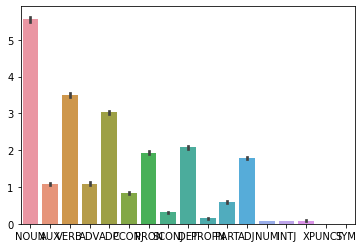

In [25]:
sns.barplot(data=pos_df)
plt.show()

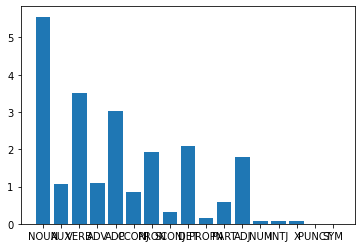

In [26]:
gif, a
plt.bar(height=pos_df.mean(axis=0).values, x=pos_df.mean(axis=0).index)
plt.show()